# Výpočet funčních hodnot polynomů a Hornerova metoda
_Štěpán Starosta, KAM FIT ČVUT, 2019_

In [70]:
def horner(x, *args):
    
    result = 0
    eb = 0 #simple error bound
    pi = 0 #running error analysis
    last = 0 #helper
    
    for coefficient in args: #order -> high to low
        result = result * x + coefficient
        eb = eb * abs(x) + abs(coefficient)
        pi = abs(x)*pi + abs(x)*abs(last) + abs(result)
        last = result
        
    uu = x.epsilon() #coefficients are expected to be in the same field, WARNING: see the definition of epsilon()     
    n = len(args)
    return result, eb, pi, eb*(2*n*uu)/(1-2*n*uu), pi*uu


In [71]:
horner(2.,1,1,1)

(7.00000000000000,
 7.00000000000000,
 27.0000000000000,
 9.32587340685133e-15,
 5.99520433297585e-15)

Uk8zka je věnovaná výpočtům funkčních hodnot polynomu $(x-2)^9$. Nyní jej defininujeme a extrahujeme koeficienty (po roznásobení).

In [72]:
var('x')
f = (x-2)^9
fabs = x^9+18*x^8+144*x^7+672*x^6+2016*x^5+4032*x^4+5376*x^3+4608*x^2+2304*x+512
e = expand(f)
print(e)
print(fabs)
coefs = [i for [i,j] in reversed(e.coefficients())]
print(coefs)

x^9 - 18*x^8 + 144*x^7 - 672*x^6 + 2016*x^5 - 4032*x^4 + 5376*x^3 - 4608*x^2 + 2304*x - 512
x^9 + 18*x^8 + 144*x^7 + 672*x^6 + 2016*x^5 + 4032*x^4 + 5376*x^3 + 4608*x^2 + 2304*x + 512
[1, -18, 144, -672, 2016, -4032, 5376, -4608, 2304, -512]


Napočteme hodnoty v různých bodech různými způsoby:
* a) vzorcem $(x-2)^9$
* b) roznásobeným vzorcem $x^{9} - 18 \, x^{8} + 144 \, x^{7} - 672 \, x^{6} + 2016 \, x^{5} - 4032 \, x^{4} + 5376 \, x^{3} - 4608 \, x^{2} + 2304 \, x - 512$
* c) Hornerovou metodou

In [74]:
#for t in [-12.1, 12.5, 0.005, 20.13]:
for t in [2.1, 2.01, 2.001]:
    print 'x = %s' % t
    print 'a) vysledek odhad_chyby'
    print(f.substitute(x=t)),
    print(f.degree(x)*t.epsilon()/(1-f.degree(x)*t.epsilon())) #proc to nevraci stejne hodnoty?
    
    print 'b) vysledek odhad chyby'
    print(f.expand().substitute(x=t)),
    print(fabs.substitute(x=t)*f.degree(x)*t.epsilon()/(1-f.degree(x)*t.epsilon()))
    
    print 'c) vysledek odhad_chyby odhad_chyby_prubezny'
    h = horner(t,*coefs)
    print(h[0],h[3],h[4])
    
    print '=================='


x = 2.10000000000000
a) vysledek odhad_chyby
1.00000000000001e-9 2.09832151654155e-15
b) vysledek odhad chyby
1.00840225059073e-9 6.86952557065843e-10
c) vysledek odhad_chyby odhad_chyby_prubezny
(9.98056748358067e-10, 1.52656123792410e-9, 7.63280618962051e-11)
x = 2.01000000000000
a) vysledek odhad_chyby
9.99999999999808e-19 2.00839345154691e-15
b) vysledek odhad chyby
-6.02540239924565e-12 5.38453433033565e-10
c) vysledek odhad_chyby odhad_chyby_prubezny
(-3.75166564481333e-12, 1.19656318451904e-9, 5.98281592259516e-11)
x = 2.00100000000000
a) vysledek odhad_chyby
9.99999999999009e-28 1.99940064504745e-15
b) vysledek odhad chyby
-8.75388650456443e-12 5.25311357164048e-10
c) vysledek odhad_chyby odhad_chyby_prubezny
(6.25277607468888e-12, 1.16735857147567e-9, 5.83679285737831e-11)


Graficky si zobrazíme důsledek špatné podmíněnosti v okolí kořenů.

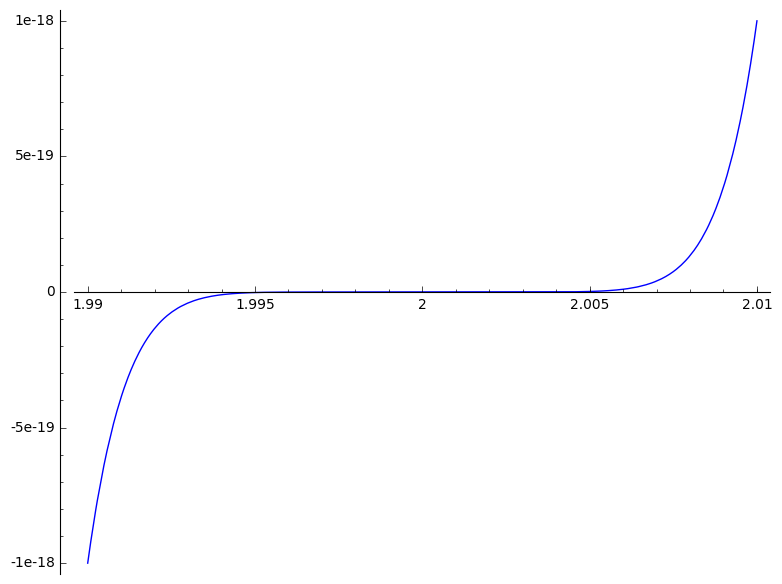

In [75]:
xmin = 1.99
xmax = 2.01
plot(f,(x,xmin,xmax),aspect_ratio='automatic')

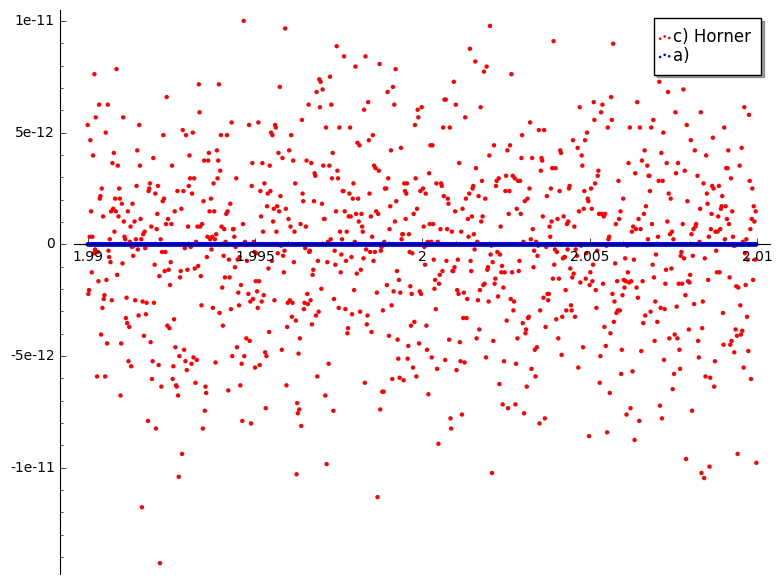

In [76]:
npoints = 1000
step = (xmax-xmin)/npoints

def listi(xmin, step, N):
    i = 0
    last = xmin
    while i < N:
        yield xmin+i*step #method 1, multiplication
        #yield last #method 2, addition
        last += step
        i += 1

q1 = point( ( (t,horner(t,*coefs)[0]) for t in listi(xmin,step,npoints)), color='red' , legend_label='c) Horner')
q2 = point( ( (t,f.substitute(x=t)) for t in listi(xmin,step,npoints)), legend_label='a)' )
q1+q2